# Minimization & Optimization
**FIZ228 - Numerical Analysis**  
Dr. Emre S. Tasci, Hacettepe University

Although we have already studied and employed various minimization commands and used them in conjunction within the optimization problems (by minimizing the errors to fit given models), a deeper insight and variations might prove useful.

In [1]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

In [2]:
np.random.seed(228)

## scipy.optimize.minimize[*](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html)

`minimize()` function from scipy's _optimize_ module handles a variety of minimization methods (if not specifically denoted, then by default uses the [BFGS](https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm) method (for unconstrained problems)).

### Single variable function
Consider a "negative gaussian" function, so instead of a peak, it will have a bottom, _i.e.,_ a definite minimum that we are seeking. We know that it will be located at the $\mu$. **However, don't forget that, in real-life situations we have no idea what the function is let alone where its minimum is.**

Pay attention that the variable $x$ is defined first and the parameters $(\mu,\sigma)$ come afterwards in the function declaration.

In [3]:
def f(x,mu,sigma):
    return -np.exp(-(x-mu)**2/(2*sigma)**2)

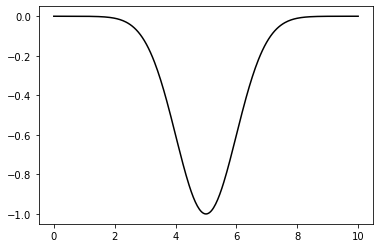

In [4]:
mu = 5
sigma = 0.7
x = np.linspace(0,10,300)
plt.plot(x,f(x,mu,sigma),"k-")
plt.show()

When calling the `minimize` function, we feed an initial guess / starting point for the x variable (here: 3) and supply the values of the characteristic parameters $(\mu,\sigma)$. 

_Once again: we are searching for the minimum -- not looking for the optimal parameters that fits a function to a given set of data!_

In [5]:
# mu and sigma here have definite values (5 & 0.7)
opt.minimize(f,3,(mu,sigma))

      fun: -1.0
 hess_inv: array([[0.98007282]])
      jac: array([2.23517418e-08])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 4
     njev: 9
   status: 0
  success: True
        x: array([5.00000001])

### Multi-variate function

As we have observed from the single variable function example, `minimize` takes the first parameter as the variable. Thus, when we are dealing with a multi-variate function, we need to implement it as a vector variable when defining the function.

Therefore a sample function of:

$$f(x,y;a,b) = (x-a)^2 + (y-b)^2$$

is defined as follows (a variable, followed by the parameters):

In [6]:
def f(xy,a,b):
    return (xy[0]-a)**2+(xy[1]-b)**2

Let's place the minimum at $(x_0,y_0) = (3,4)$:

In [7]:
x = np.linspace(-1,7,100)
y = np.linspace(-1,9,100)
(xx,yy) = np.meshgrid(x,y)
zz = f((xx,yy),3,4)

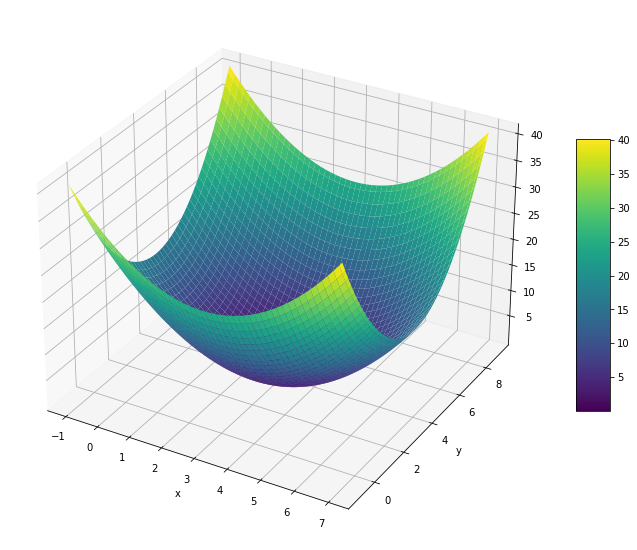

In [8]:
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

plt.xlabel('x')
plt.ylabel('y')

surf = ax.plot_surface(xx, yy, zz, cmap = plt.cm.viridis)
fig.colorbar(surf, shrink=0.5, aspect=8)
plt.show()

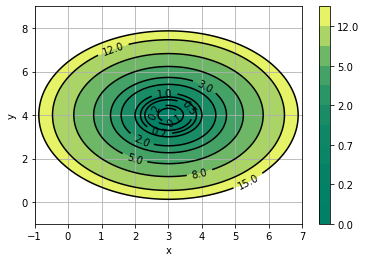

In [9]:
#levels = np.arange(0,15,3)
levels = np.array([0,0.1,0.2,0.5,0.7,1,2,3,5,8,12,15])

lo1 = plt.contourf(xx, yy, zz, cmap = plt.cm.summer,levels=levels)
plt.grid(False)
plt.rcParams['axes.grid'] = False
plt.colorbar()

lo2 = plt.contour(xx, yy, zz, colors='k',levels=levels)
plt.xlabel('x')
plt.ylabel('y')
plt.clabel(lo2, inline=True, fontsize=10)


plt.grid()

plt.show()

And here is how we find its minimum (by starting from (x<sub>0</sub>,y<sub>0</sub>) = (1,2) and characterizing the function by setting the (a,b) parameters to (3,4)):

In [10]:
opt.minimize(f,[1,2],(3,4))

      fun: 3.933451217590424e-15
 hess_inv: array([[ 0.74999999, -0.25      ],
       [-0.25      ,  0.75000001]])
      jac: array([-9.85826034e-08,  6.83356074e-08])
  message: 'Optimization terminated successfully.'
     nfev: 9
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([2.99999994, 4.00000003])

### Minimization with constraints

Sometimes, one or more constraints is present. Suppose that for our previously defined function $f(x,y;a,b) = (x-a)^2 + (y-b)^2$, we want to minimize it but we also want to satisfy the condition of $2x + 3y = 5$. This is where the `constraints` parameter comes into play: the constraint (in our case, we'll be dealing only with linear constraints such as $a_0x_0 + a_1x_1 + \dots + a_nx_n = E$ -- we can even flex this constraint into a more generalized inequality, such as:

$$E_{min} \le a_0x_0 + a_1x_1 + \dots + a_nx_n \le E_{max}$$

or more formally as a cofficient matrix - vector multiplication:

$$E_{min} \le \begin{pmatrix}a_0&a_1&\dots&a_n\end{pmatrix}\cdot\begin{pmatrix}x_0\\x_1\\\vdots\\ x_n\end{pmatrix}\le E_{max}$$

Returning to our example, we can write our constraint $2x + 3y = 5$ as a coefficient matrix - vector multiplication, bounded from bottom and top in the form of:

$$5 \le \begin{pmatrix}2&3\end{pmatrix}\cdot\begin{pmatrix}x\\y\end{pmatrix}\le 5$$

_See that, by setting the lower and upper bound to the same value, we have thus defined an equality._

In [11]:
# This is our coefficient matrix
A = np.array([2,3])

We introduce our constraint via the `opt.LinearConstraint()` method, where the first parameter is the coefficient matrix, followed by the lower and upper bounds, respectively:

In [12]:
opt.minimize(f,[1,2],(3,4),constraints=opt.LinearConstraint(A,5,5))

     fun: 13.0
     jac: array([-4., -6.])
 message: 'Optimization terminated successfully'
    nfev: 16
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([1.00000001, 0.99999999])

**Example: Heron's Formula**

Heron's formula (formulated by [Heron of Alexandria](https://en.wikipedia.org/wiki/Heron_of_Alexandria), 1st century) is used to calculate the area of a triangle when its side lengths $(a,b,c)$ are known. 

If $s$ is defined as $s = \tfrac{1}{2}(a+b+c)$, then the area $A$ is given by:

$$A=\sqrt{s(s-a)(s-b)(s-c)}$$

or, alternatively as:

$$A=\tfrac{1}{4}\sqrt{4a^2b^2-(a^2+b^2-c^2)^2}$$

In [13]:
def HeronTri(x):
    # Heron's Formula
    return np.sqrt(4*x[0]**2*x[1]**2 - (x[0]**2+x[1]**2-x[2]**2)**2)/4

Suppose that we have a rope of length 18 cm, and we want to form a triangle with the lowest area, given that its side lengths are at least 2 cm.

_Why at least 2 cm?_

Otherwise it would be a boring question as we could take one side to be almost 0 and divide the remaining length to 2:

In [14]:
abc = (1E-8,(18-1E-8)/2,(18-1E-8)/2)
abc,HeronTri(abc),np.sum(abc)

((1e-08, 8.999999995, 8.999999995), 4.4999999975e-08, 18.0)

Here are two possible cases that come to mind and their corresponding areas:

In [15]:
HeronTri([6,6,6])

15.588457268119896

In [16]:
HeronTri([5,6,7])

14.696938456699069

Can we do better?

Since we are dealing with a triangle, the triangle inequalities must also be obeyed, _i.e.,_:

* $ a + b > c \rightarrow a + b - c > 0$
* $ b + c > a \rightarrow -a + b + c > 0$
* $ c + a > b \rightarrow a - b + c > 0$

along with the constraint due to the rope-length: $a+b+c = 18$

Combining all, we have the following constraints:

In [17]:
con_a = opt.LinearConstraint([1,0,0],2,18) # 2 <= a <= 18
con_b = opt.LinearConstraint([0,1,0],2,18) # 2 <= b <= 18
con_c = opt.LinearConstraint([0,0,1],2,18) # 2 <= c <= 18
con_d = opt.LinearConstraint([1,1,-1],1E-3,18) # 0 <  a + b - c <= 18
con_e = opt.LinearConstraint([-1,1,1],1E-3,18) # 0 < -a + b + c <= 18
con_f = opt.LinearConstraint([1,-1,1],1E-3,18) # 0 <  a - b - c <= 18
con_g = opt.LinearConstraint([1,1,1],18,18) # a + b + c = 18
cons = [con_a,con_b,con_c,con_d,con_e,con_f,con_g]

(Instead of specifying each constraint individually, we could have collected them in a matrix -- see the "[Collecting constraints](#collecting_constraints)" heading below)

We have set the upper limits of the sides and the inequalities to the rope length because it makes sense! ;)

In [18]:
res = opt.minimize(HeronTri,[3,4,5],constraints=cons)
res

     fun: 0.25096663215760445
     jac: array([ 125.51225776,  125.46742659, -125.43649042])
 message: 'Optimization terminated successfully'
    nfev: 32
     nit: 9
    njev: 8
  status: 0
 success: True
       x: array([2.00000052, 7.00049948, 8.9995    ])

In [19]:
HeronTri(res.x),res.x.sum()

(0.25096663215760445, 18.0)

Even though it's a very boring triangle, it satisfies all the conditions, including the triangle inequalities:

In [20]:
(x,y,z) = res.x

In [21]:
x + y > z

True

In [22]:
y + z > x

True

In [23]:
x + z > y

True

**Challenge #1:** Can you find the triangle with the minimum area subject to to the above constraints, but also satisfies the condition such that the difference between any two sides is less than 3?

**Challenge #2:** What about the maximum area yielding triangle, subject to the condition that the sum of its side lengths is equal to 18?

**Side information:**

Analytically, these kind of minimization problems with constraints are usually solved using a wonderful technique called _Lagrange Multipliers<sup>[1](https://tutorial.math.lamar.edu/classes/calciii/lagrangemultipliers.aspx),</sup><sup>[2](https://math.libretexts.org/Bookshelves/Calculus/Calculus_\(OpenStax\)/14%3A_Differentiation_of_Functions_of_Several_Variables/14.08%3A_Lagrange_Multipliers)</sup>_.

**Lesson to learn: Starting values** 

If we had chosen a different starting point than (3,4,5) in our search above, we'd -most likely- still be able to land at the same minimum, e.g.,

In [24]:
res = opt.minimize(HeronTri,[3,8,10],constraints=cons)
res

     fun: 0.2509666312379804
     jac: array([ 125.5122354 ,  125.46740331, -125.43646712])
 message: 'Optimization terminated successfully'
    nfev: 8
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([2.    , 7.0005, 8.9995])

In [25]:
res = opt.minimize(HeronTri,[7,11,5],constraints=cons)
res

     fun: 0.2509666312473801
     jac: array([ 125.4674261 , -125.43644052,  125.51223542])
 message: 'Optimization terminated successfully'
    nfev: 24
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([7.0005, 8.9995, 2.    ])

However, check what happens when we introduce symmetry:

In [26]:
res = opt.minimize(HeronTri,[3,3,3],constraints=cons)
res

     fun: 15.588457268119898
     jac: array([1.73205078, 1.73205078, 1.73205078])
 message: 'Optimization terminated successfully'
    nfev: 8
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([6., 6., 6.])

Taking a starting value of $a=b=c$ effects the algorithm such that, due to the symmetry, it opts to move in the same direction, hence, ending at the worst solution. A similar issue ensues for lower symmetries ($a=b\ne c;a\ne b=c;a=c\ne b$) as well:

In [27]:
res = opt.minimize(HeronTri,[3,3,5],constraints=cons)
res

     fun: 0.30185240645226274
     jac: array([ 150.93402367,  150.9340221 , -150.88483753])
 message: 'Optimization terminated successfully'
    nfev: 8
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([4.50025, 4.50025, 8.9995 ])

Thus, always make sure that you chose various starting points and don't incorporate symmetries unless there's a specific reason to do so!

**Collecting constraints**<a id='collecting_constraints'></a>

In the above example, we defined each constraint separately and then collected them in an array but remembering that $A$ is the coefficient matrix, we could have all collected them in $A$:

In [28]:
A=np.array([[1,0,0],
            [0,1,0],
            [0,0,1],
            [1,1,-1],
            [1,-1,1],
            [-1,1,1]])
con_inequalities = opt.LinearConstraint(A,[2,2,2,1E-3,1E-3,1E-3],18)
con_equality = opt.LinearConstraint([1,1,1],18,18)
cons = [con_inequalities,con_equality]

res = opt.minimize(HeronTri,[3,4,5],constraints=cons)
res

     fun: 0.25096663215760445
     jac: array([ 125.51225776,  125.46742659, -125.43649042])
 message: 'Optimization terminated successfully'
    nfev: 32
     nit: 9
    njev: 8
  status: 0
 success: True
       x: array([2.00000052, 7.00049948, 8.9995    ])

A couple of things to consider:

* We grouped the inequality constraints together but left the equality constraint out -- this is for efficiency (if we had also included it, then Python would have warned us to keep them separate)

* We have individually declared the lowerbounds whereas for the upperbound, we entered a single value as it is common (if we wanted, we could have of course, typed 18 six times as an array)

# Gradient Descent Algorithm

In order to grasp the meaning of the minimization procedure, we will explicitly investigate the gradient descent algorithm.

This algorithm works by moving along the steepest direction and steeper the slope, the bigger steps we take.

Imagine that you find yourself on the side of a hill, surrounded by a mist, unable to see 1 meter ahead and you want to reach to the bottom of the hill (and for some reason, you can't walk but teleport (meaning that, you don't interact with whatever is between you and your destination -- can't see, can't feel)). What you do is, you move along the down slope. Mathematically speaking, for a 1-dimensional graph of a function, if the slope at the place you are positioned is positive (positive slope means that as x increases, the function value increases), it means that the down is towards left (i.e., if you pour some water to the ground, it will flow downwards: so, <u>slope positive -> move towards left (-x direction)</u> and vice versa (<u>slope negative -> move towards right</u>)). Since the slope of a function at any point is defined by its derivative, it's very helpful to have the function's derivative also defined, if possible.

As it's much easier to understand the procedure by working on an example, we'll cover a parabola and the "negative gaussian" function we have already defined at the beginning of this lecture.

## Parabola

In [29]:
def f(x,abc):
    return abc[0]*x**2+abc[1]*x+abc[2]

def g(x,abc):
    # Derivative
    return 2*abc[0]*x+abc[1]

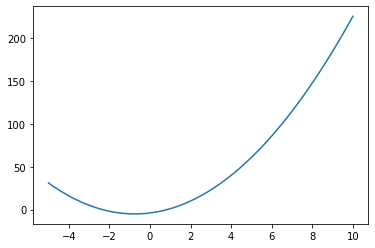

In [30]:
xx = np.linspace(-5,10,100)
abc = np.array([2,3,-4])
plt.plot(xx,f(xx,abc))
plt.show()

So, this is the function we are trying to find its minimum. Once again, don't forget that, we do not necessarily know the function or what it looks like: it might be a property of a material/medium like the location of a room with the minimal electrical field, the concentration of a component in a compound that yields the most optimal conductivity, or it can be a function so complicated that even though we want to calculate its minimum, can't calculate its derivative to set it to zero and solve that way analytically...

It is assumed that we ask ("shoot") for the value at the position we are interested, and for each of our queries, we have to spend some time/money/material, so the sooner we reach the minimum the better!

We have to start from somewhere... Let's start from x = 5: at this point, the slope is:

In [31]:
g(5,abc)

23

It is positive (we will walk towards left) and has a value of 23 (we will take a big step). The slope's value at that point determine the step size since as we move closer to the minimum, the slope magnitude decreases:

x:  9.75 | Slope: 42.00
x:  8.00 | Slope: 35.00
x:  6.25 | Slope: 28.00
x:  4.50 | Slope: 21.00
x:  2.75 | Slope: 14.00
x:  1.00 | Slope:  7.00
x: -0.75 | Slope:  0.00


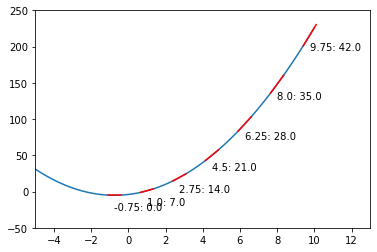

In [32]:
plt.plot(xx,f(xx,abc))
i = 7
for x in np.arange(9.75,-0.76,-1.75):
    x12 = np.array([x-0.35,x+0.35])
    plt.plot(x12,f(x12,abc),"r-")
    plt.text(x,f(x,abc)-20,str(x)+": "+str(g(x,abc)))
    i -= 1
    print("x: {:5.2f} | Slope: {:5.2f}".format(x,g(x,abc)))
plt.axis([-5,13,-50,250])
plt.show()

As you can check from the red lines depicting the slopes, their value decrease as one moves towards the minimum.

Only at the minimum(/maximum) the slope becomes 0 as it is the characteristic of extrema. Since we are moving along the decrease direction of the slope, we are moving towards the minimum.

Depending on the function, taking a step size equal to the slope value at that position might prove to be too big or too little. We compensate this fact by using a factor usually labelled as $\eta$. $\eta$ isn't necessarily taken as constant, it can be coded to be updated as the slope values process (adaptive approach).

Also, we can decide when to stop by defining a threshold tolerance for the magnitude of slope.

Let's apply these procedures to the parabola, step by step (keep in mind that we know the values of the function only at the specified positions):

Step #1
The derivative (gradient) at x = 5.00000 is 23.00000
	As it is positive, go left by: (this amount)*eta(=0.40).
	==> The new x is 5.00000-9.20000=-4.20000


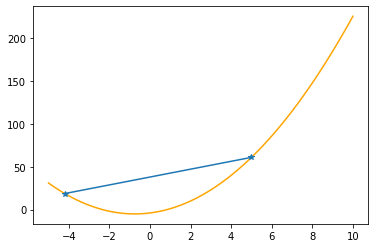

---------------------------------------------
Step #2
The derivative (gradient) at x = -4.20000 is -13.80000
	As it is negative, go right by: |this amount|*eta(=0.40).
	==> The new x is -4.20000+5.52000=1.32000


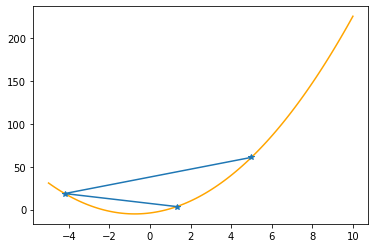

---------------------------------------------
Step #3
The derivative (gradient) at x = 1.32000 is 8.28000
	As it is positive, go left by: (this amount)*eta(=0.40).
	==> The new x is 1.32000-3.31200=-1.99200


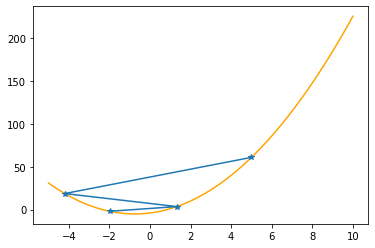

---------------------------------------------
Step #4
The derivative (gradient) at x = -1.99200 is -4.96800
	As it is negative, go right by: |this amount|*eta(=0.40).
	==> The new x is -1.99200+1.98720=-0.00480


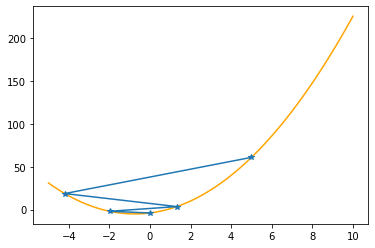

---------------------------------------------
Step #5
The derivative (gradient) at x = -0.00480 is 2.98080
	As it is positive, go left by: (this amount)*eta(=0.40).
	==> The new x is -0.00480-1.19232=-1.19712


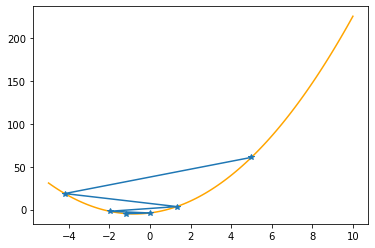

---------------------------------------------
Step #6
The derivative (gradient) at x = -1.19712 is -1.78848
	As it is negative, go right by: |this amount|*eta(=0.40).
	==> The new x is -1.19712+0.71539=-0.48173


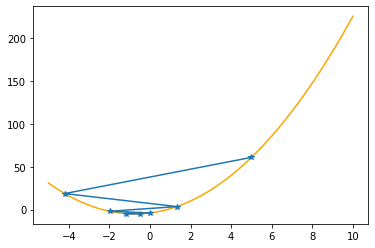

---------------------------------------------
Step #7
The derivative (gradient) at x = -0.48173 is 1.07309
	As it is positive, go left by: (this amount)*eta(=0.40).
	==> The new x is -0.48173-0.42924=-0.91096


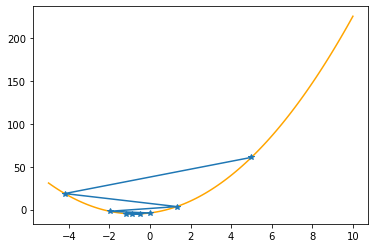

---------------------------------------------
Step #8
The derivative (gradient) at x = -0.91096 is -0.64385
	As it is negative, go right by: |this amount|*eta(=0.40).
	==> The new x is -0.91096+0.25754=-0.65342


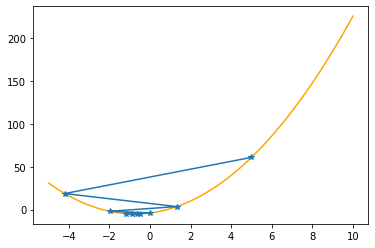

---------------------------------------------
Step #9
The derivative (gradient) at x = -0.65342 is 0.38631
	As it is positive, go left by: (this amount)*eta(=0.40).
	==> The new x is -0.65342-0.15452=-0.80795


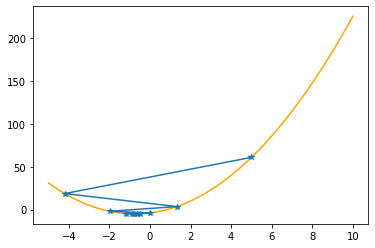

---------------------------------------------
Step #10
The derivative (gradient) at x = -0.80795 is -0.23179
	As it is negative, go right by: |this amount|*eta(=0.40).
	==> The new x is -0.80795+0.09271=-0.71523


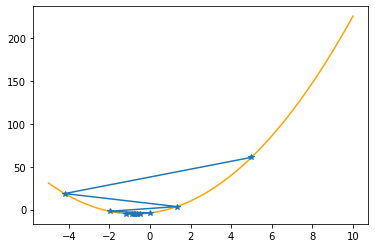

---------------------------------------------
Step #11
The derivative (gradient) at x = -0.71523 is 0.13907
	As it is positive, go left by: (this amount)*eta(=0.40).
	==> The new x is -0.71523-0.05563=-0.77086


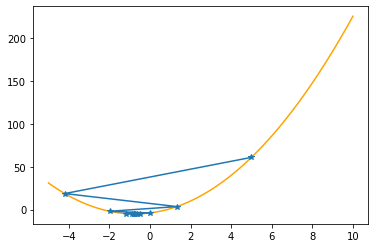

---------------------------------------------
Step #12
The derivative (gradient) at x = -0.77086 is -0.08344
	As it is negative, go right by: |this amount|*eta(=0.40).
	==> The new x is -0.77086+0.03338=-0.73748


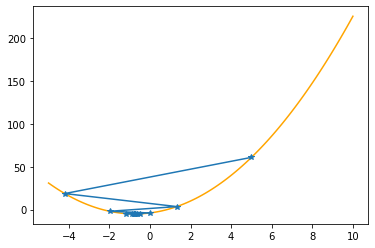

---------------------------------------------
Step #13
The derivative (gradient) at x = -0.73748 is 0.05007
	As it is positive, go left by: (this amount)*eta(=0.40).
	==> The new x is -0.73748-0.02003=-0.75751


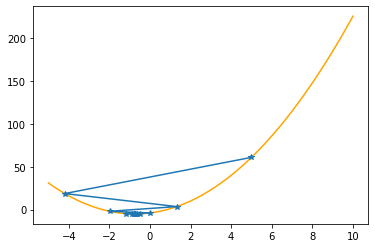

---------------------------------------------
Step #14
The derivative (gradient) at x = -0.75751 is -0.03004
	As it is negative, go right by: |this amount|*eta(=0.40).
	==> The new x is -0.75751+0.01202=-0.74549


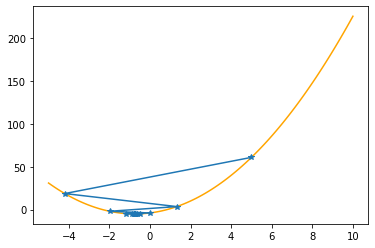

---------------------------------------------
Step #15
The derivative (gradient) at x = -0.74549 is 0.01802
	As it is positive, go left by: (this amount)*eta(=0.40).
	==> The new x is -0.74549-0.00721=-0.75270


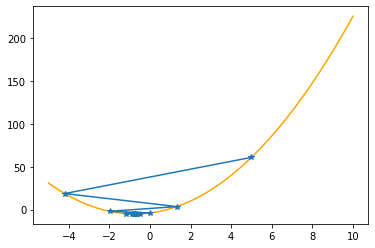

---------------------------------------------
Step #16
The derivative (gradient) at x = -0.75270 is -0.01081
	As it is negative, go right by: |this amount|*eta(=0.40).
	==> The new x is -0.75270+0.00433=-0.74838


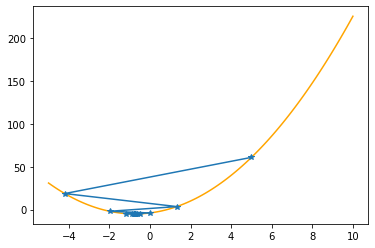

---------------------------------------------
Step #17
The derivative (gradient) at x = -0.74838 is 0.00649
	As it is positive, go left by: (this amount)*eta(=0.40).
	==> The new x is -0.74838-0.00260=-0.75097


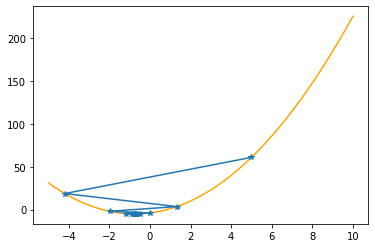

---------------------------------------------
Step #18
The derivative (gradient) at x = -0.75097 is -0.00389
	As it is negative, go right by: |this amount|*eta(=0.40).
	==> The new x is -0.75097+0.00156=-0.74942


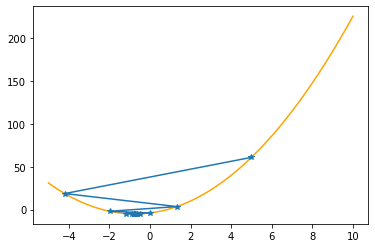

---------------------------------------------
Step #19
The derivative (gradient) at x = -0.74942 is 0.00234
	As it is positive, go left by: (this amount)*eta(=0.40).
	==> The new x is -0.74942-0.00093=-0.75035


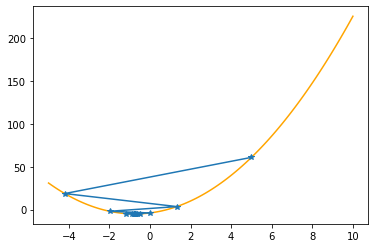

---------------------------------------------
Step #20
The derivative (gradient) at x = -0.75035 is -0.00140
	As it is negative, go right by: |this amount|*eta(=0.40).
	==> The new x is -0.75035+0.00056=-0.74979


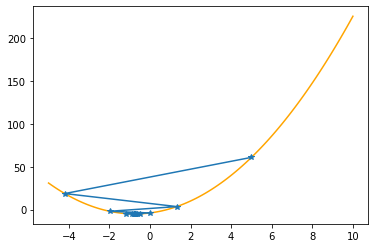

---------------------------------------------
Step #21
The derivative (gradient) at x = -0.74979 is 0.00084
	As it is positive, go left by: (this amount)*eta(=0.40).
	==> The new x is -0.74979-0.00034=-0.75013


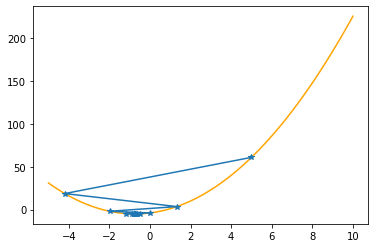

---------------------------------------------
Step #22
The derivative (gradient) at x = -0.75013 is -0.00050
	As it is negative, go right by: |this amount|*eta(=0.40).
	==> The new x is -0.75013+0.00020=-0.74992


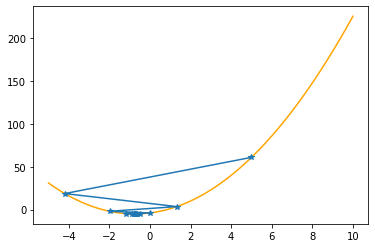

---------------------------------------------
Step #23
The derivative (gradient) at x = -0.74992 is 0.00030
	As it is positive, go left by: (this amount)*eta(=0.40).
	==> The new x is -0.74992-0.00012=-0.75005


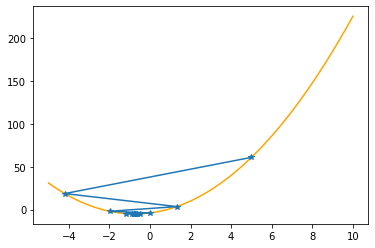

---------------------------------------------
Step #24
The derivative (gradient) at x = -0.75005 is -0.00018
	As it is negative, go right by: |this amount|*eta(=0.40).
	==> The new x is -0.75005+0.00007=-0.74997


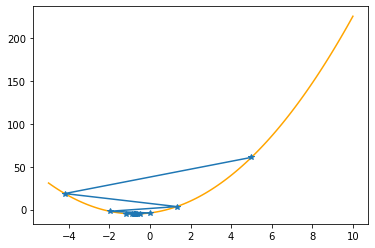

---------------------------------------------
Step #25
The derivative (gradient) at x = -0.74997 is 0.00011
	As it is positive, go left by: (this amount)*eta(=0.40).
	==> The new x is -0.74997-0.00004=-0.75002


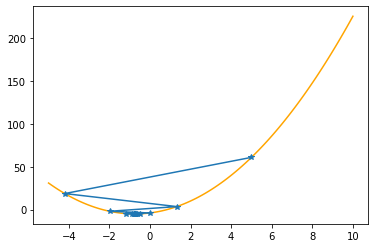

---------------------------------------------
Step #26
The derivative (gradient) at x = -0.75002 is -0.00007
	As it is sufficiently close to zero, we have found the minima!


In [33]:
x = 5
N = 50
eta = .4
tolerance = 1E-4
xs_so_far = [x]
fs_so_far = [f(x,abc)]
for i in range(N):
    gg = g(x,abc)
    print("Step #{:d}".format(i+1))
    print("The derivative (gradient) at x = {:7.5f} is {:7.5f}"\
          .format(x,gg))
    if(np.abs(gg)<tolerance):
        print("\tAs it is sufficiently close to zero, we have found the minima!")
        break
    elif(gg>0):
        print("\tAs it is positive, go left by: "+
              "(this amount)*eta(={:.2f}).".format(eta))
    else:
        print("\tAs it is negative, go right by: "+
              "|this amount|*eta(={:.2f}).".format(eta))

    delta = -gg*eta
    x0 = x
    x = x + delta
    xs_so_far.append(x)
    fs_so_far.append(f(x,abc))
    print("\t==> The new x is {:7.5f}{:+7.5f}={:7.5f}".format(x0,delta,x))
    plt.plot(xx,f(xx,abc),color="orange")
    plt.plot(xs_so_far,fs_so_far,"*-")
    plt.show()

    print("-"*45)

In [34]:
# Real minimum:# Real minimum:
np.roots([2*abc[0],abc[1]]) # root of 2ax + b

array([-0.75])

## "Negative" Gaussian

In [35]:
def f(x,mu,sigma):
    return -np.exp(-(x-mu)**2/(2*sigma**2))

def g(x,mu,sigma):
    return (x-mu)/(sigma**2)*np.exp(-(x-mu)**2/(2*sigma**2))

In [36]:
mu = 5
sigma = 1

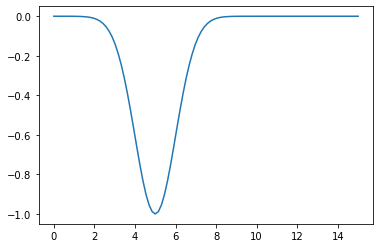

In [37]:
xx = np.linspace(0,15,100)
plt.plot(xx,f(xx,mu,sigma))
plt.show()

Step #1
The derivative (gradient) at x = 8.00000 is 0.0333
	As it is positive, go left by: (this amount)*eta(=0.40).
	==> The new x is 8.00000-0.01333=7.98667


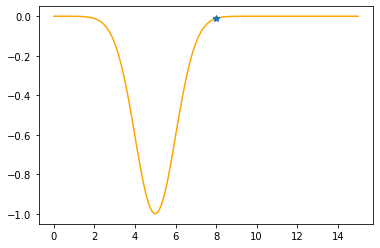

---------------------------------------------
Step #2
The derivative (gradient) at x = 7.98667 is 0.0345
	As it is positive, go left by: (this amount)*eta(=0.40).
	==> The new x is 7.98667-0.01381=7.97286


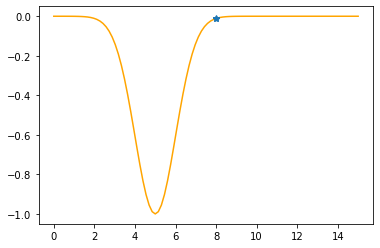

---------------------------------------------
Step #3
The derivative (gradient) at x = 7.97286 is 0.0358
	As it is positive, go left by: (this amount)*eta(=0.40).
	==> The new x is 7.97286-0.01433=7.95853


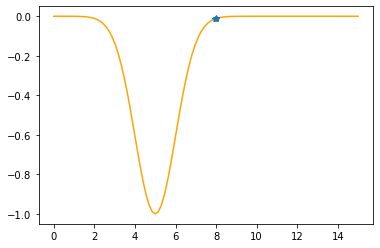

---------------------------------------------
Step #4
The derivative (gradient) at x = 7.95853 is 0.0372
	As it is positive, go left by: (this amount)*eta(=0.40).
	==> The new x is 7.95853-0.01488=7.94366


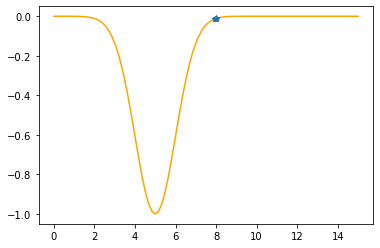

---------------------------------------------
Step #5
The derivative (gradient) at x = 7.94366 is 0.0387
	As it is positive, go left by: (this amount)*eta(=0.40).
	==> The new x is 7.94366-0.01546=7.92819


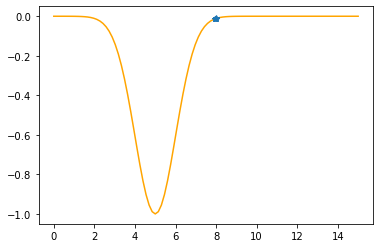

---------------------------------------------
Step #6
The derivative (gradient) at x = 7.92819 is 0.0402
	As it is positive, go left by: (this amount)*eta(=0.40).
	==> The new x is 7.92819-0.01610=7.91209


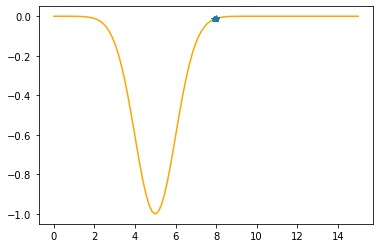

---------------------------------------------
Step #7
The derivative (gradient) at x = 7.91209 is 0.0420
	As it is positive, go left by: (this amount)*eta(=0.40).
	==> The new x is 7.91209-0.01678=7.89531


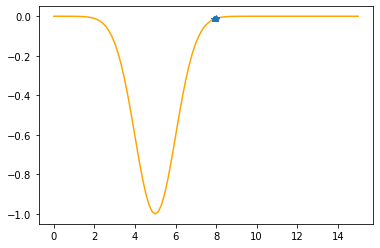

---------------------------------------------
Step #8
The derivative (gradient) at x = 7.89531 is 0.0438
	As it is positive, go left by: (this amount)*eta(=0.40).
	==> The new x is 7.89531-0.01752=7.87780


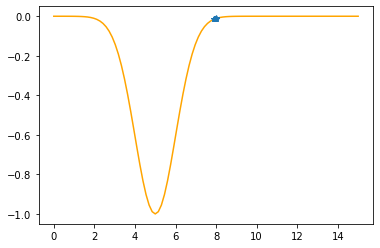

---------------------------------------------
Step #9
The derivative (gradient) at x = 7.87780 is 0.0458
	As it is positive, go left by: (this amount)*eta(=0.40).
	==> The new x is 7.87780-0.01831=7.85948


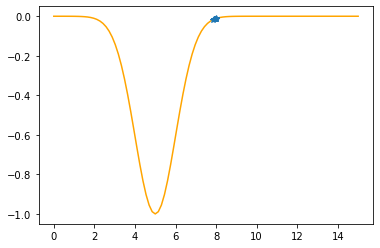

---------------------------------------------
Step #10
The derivative (gradient) at x = 7.85948 is 0.0479
	As it is positive, go left by: (this amount)*eta(=0.40).
	==> The new x is 7.85948-0.01918=7.84031


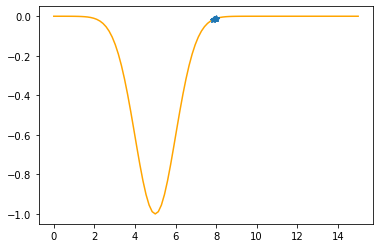

---------------------------------------------
Step #11
The derivative (gradient) at x = 7.84031 is 0.0503
	As it is positive, go left by: (this amount)*eta(=0.40).
	==> The new x is 7.84031-0.02012=7.82019


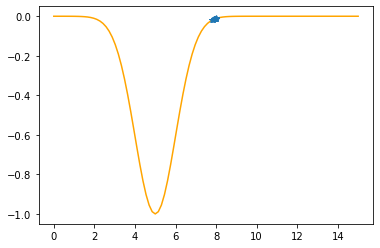

---------------------------------------------
Step #12
The derivative (gradient) at x = 7.82019 is 0.0529
	As it is positive, go left by: (this amount)*eta(=0.40).
	==> The new x is 7.82019-0.02115=7.79904


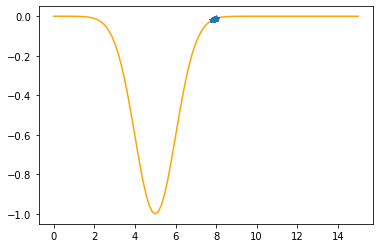

---------------------------------------------
Step #13
The derivative (gradient) at x = 7.79904 is 0.0557
	As it is positive, go left by: (this amount)*eta(=0.40).
	==> The new x is 7.79904-0.02227=7.77676


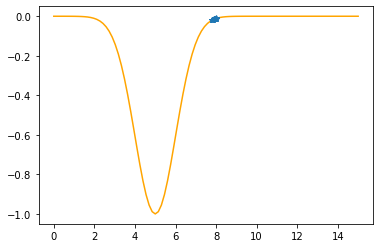

---------------------------------------------
Step #14
The derivative (gradient) at x = 7.77676 is 0.0588
	As it is positive, go left by: (this amount)*eta(=0.40).
	==> The new x is 7.77676-0.02351=7.75325


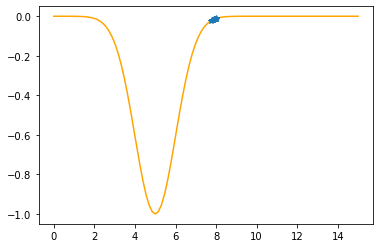

---------------------------------------------
Step #15
The derivative (gradient) at x = 7.75325 is 0.0622
	As it is positive, go left by: (this amount)*eta(=0.40).
	==> The new x is 7.75325-0.02488=7.72837


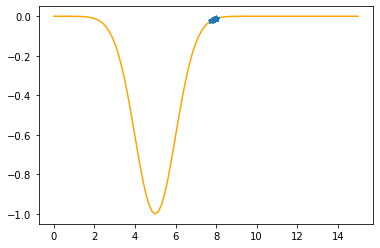

---------------------------------------------
Step #16
The derivative (gradient) at x = 7.72837 is 0.0660
	As it is positive, go left by: (this amount)*eta(=0.40).
	==> The new x is 7.72837-0.02639=7.70198


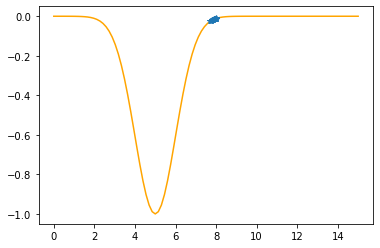

---------------------------------------------
Step #17
The derivative (gradient) at x = 7.70198 is 0.0702
	As it is positive, go left by: (this amount)*eta(=0.40).
	==> The new x is 7.70198-0.02808=7.67389


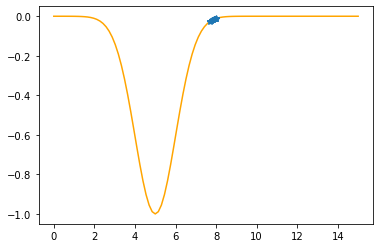

---------------------------------------------
Step #18
The derivative (gradient) at x = 7.67389 is 0.0749
	As it is positive, go left by: (this amount)*eta(=0.40).
	==> The new x is 7.67389-0.02997=7.64393


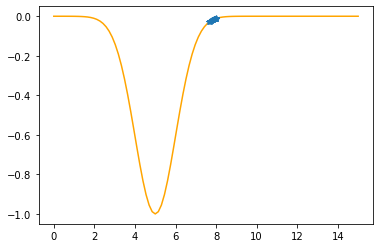

---------------------------------------------
Step #19
The derivative (gradient) at x = 7.64393 is 0.0802
	As it is positive, go left by: (this amount)*eta(=0.40).
	==> The new x is 7.64393-0.03209=7.61184


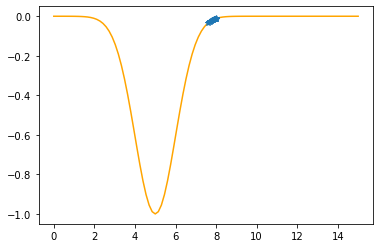

---------------------------------------------
Step #20
The derivative (gradient) at x = 7.61184 is 0.0862
	As it is positive, go left by: (this amount)*eta(=0.40).
	==> The new x is 7.61184-0.03449=7.57735


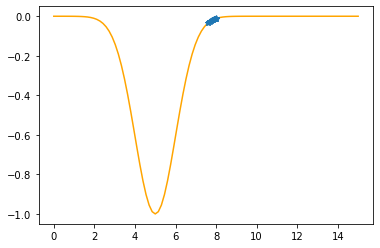

---------------------------------------------
Step #21
The derivative (gradient) at x = 7.57735 is 0.0931
	As it is positive, go left by: (this amount)*eta(=0.40).
	==> The new x is 7.57735-0.03722=7.54012


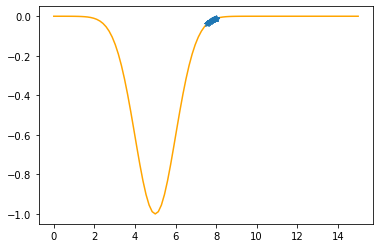

---------------------------------------------
Step #22
The derivative (gradient) at x = 7.54012 is 0.1009
	As it is positive, go left by: (this amount)*eta(=0.40).
	==> The new x is 7.54012-0.04035=7.49978


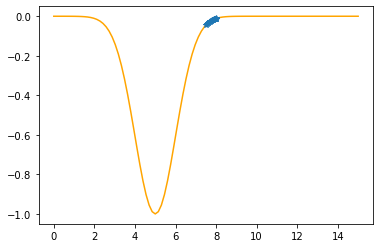

---------------------------------------------
Step #23
The derivative (gradient) at x = 7.49978 is 0.1099
	As it is positive, go left by: (this amount)*eta(=0.40).
	==> The new x is 7.49978-0.04396=7.45582


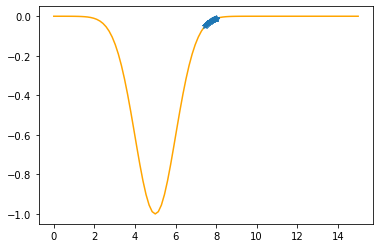

---------------------------------------------
Step #24
The derivative (gradient) at x = 7.45582 is 0.1204
	As it is positive, go left by: (this amount)*eta(=0.40).
	==> The new x is 7.45582-0.04815=7.40766


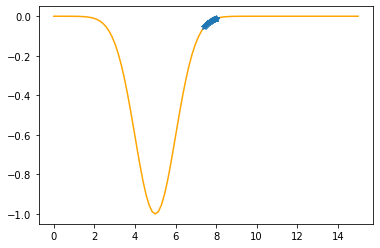

---------------------------------------------
Step #25
The derivative (gradient) at x = 7.40766 is 0.1327
	As it is positive, go left by: (this amount)*eta(=0.40).
	==> The new x is 7.40766-0.05307=7.35459


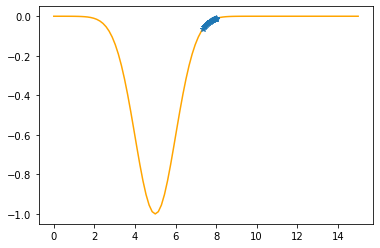

---------------------------------------------
Step #26
The derivative (gradient) at x = 7.35459 is 0.1472
	As it is positive, go left by: (this amount)*eta(=0.40).
	==> The new x is 7.35459-0.05890=7.29569


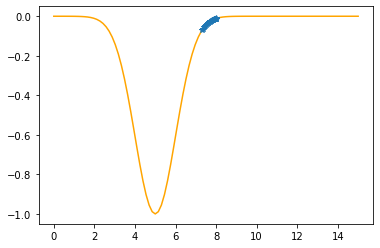

---------------------------------------------
Step #27
The derivative (gradient) at x = 7.29569 is 0.1646
	As it is positive, go left by: (this amount)*eta(=0.40).
	==> The new x is 7.29569-0.06585=7.22984


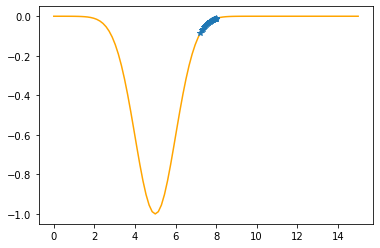

---------------------------------------------
Step #28
The derivative (gradient) at x = 7.22984 is 0.1856
	As it is positive, go left by: (this amount)*eta(=0.40).
	==> The new x is 7.22984-0.07424=7.15560


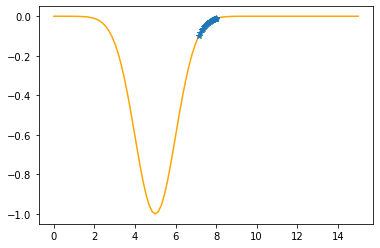

---------------------------------------------
Step #29
The derivative (gradient) at x = 7.15560 is 0.2111
	As it is positive, go left by: (this amount)*eta(=0.40).
	==> The new x is 7.15560-0.08446=7.07115


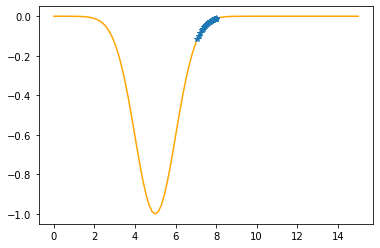

---------------------------------------------
Step #30
The derivative (gradient) at x = 7.07115 is 0.2425
	As it is positive, go left by: (this amount)*eta(=0.40).
	==> The new x is 7.07115-0.09700=6.97414


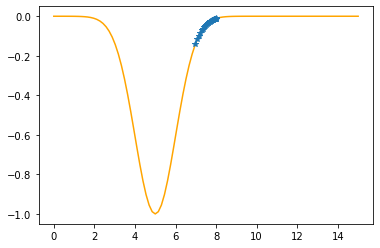

---------------------------------------------
Step #31
The derivative (gradient) at x = 6.97414 is 0.2813
	As it is positive, go left by: (this amount)*eta(=0.40).
	==> The new x is 6.97414-0.11250=6.86164


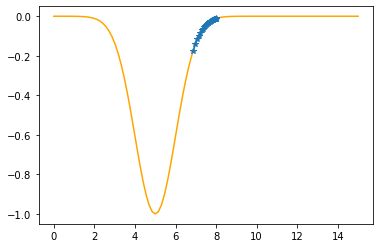

---------------------------------------------
Step #32
The derivative (gradient) at x = 6.86164 is 0.3291
	As it is positive, go left by: (this amount)*eta(=0.40).
	==> The new x is 6.86164-0.13164=6.73000


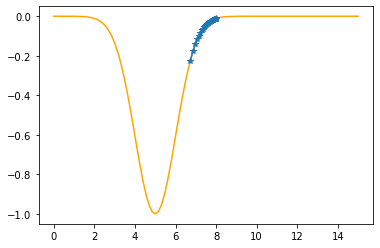

---------------------------------------------
Step #33
The derivative (gradient) at x = 6.73000 is 0.3874
	As it is positive, go left by: (this amount)*eta(=0.40).
	==> The new x is 6.73000-0.15495=6.57505


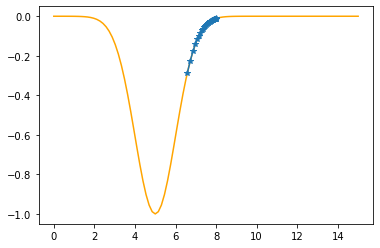

---------------------------------------------
Step #34
The derivative (gradient) at x = 6.57505 is 0.4556
	As it is positive, go left by: (this amount)*eta(=0.40).
	==> The new x is 6.57505-0.18225=6.39280


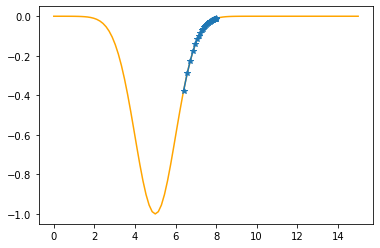

---------------------------------------------
Step #35
The derivative (gradient) at x = 6.39280 is 0.5280
	As it is positive, go left by: (this amount)*eta(=0.40).
	==> The new x is 6.39280-0.21121=6.18159


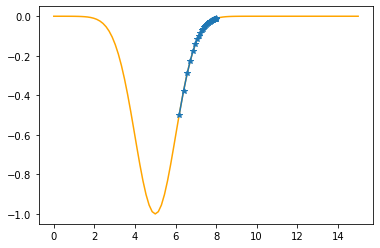

---------------------------------------------
Step #36
The derivative (gradient) at x = 6.18159 is 0.5879
	As it is positive, go left by: (this amount)*eta(=0.40).
	==> The new x is 6.18159-0.23516=5.94644


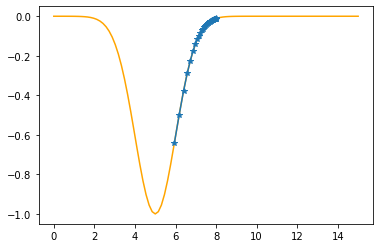

---------------------------------------------
Step #37
The derivative (gradient) at x = 5.94644 is 0.6048
	As it is positive, go left by: (this amount)*eta(=0.40).
	==> The new x is 5.94644-0.24190=5.70453


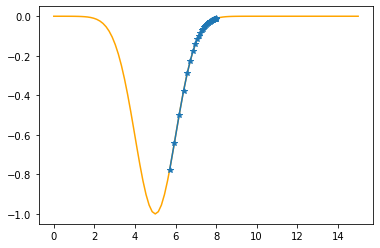

---------------------------------------------
Step #38
The derivative (gradient) at x = 5.70453 is 0.5497
	As it is positive, go left by: (this amount)*eta(=0.40).
	==> The new x is 5.70453-0.21988=5.48466


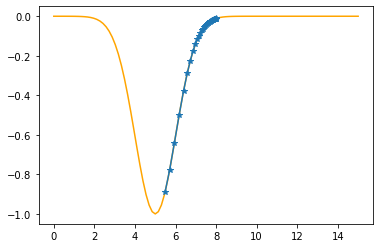

---------------------------------------------
Step #39
The derivative (gradient) at x = 5.48466 is 0.4310
	As it is positive, go left by: (this amount)*eta(=0.40).
	==> The new x is 5.48466-0.17238=5.31228


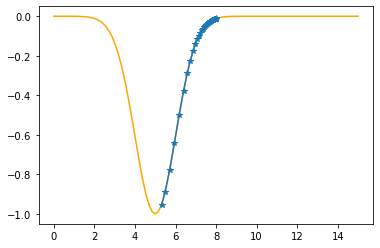

---------------------------------------------
Step #40
The derivative (gradient) at x = 5.31228 is 0.2974
	As it is positive, go left by: (this amount)*eta(=0.40).
	==> The new x is 5.31228-0.11897=5.19331


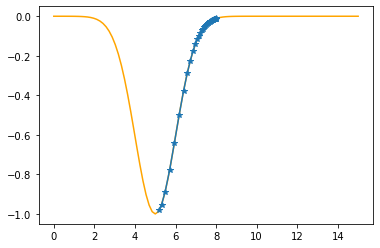

---------------------------------------------
Step #41
The derivative (gradient) at x = 5.19331 is 0.1897
	As it is positive, go left by: (this amount)*eta(=0.40).
	==> The new x is 5.19331-0.07589=5.11742


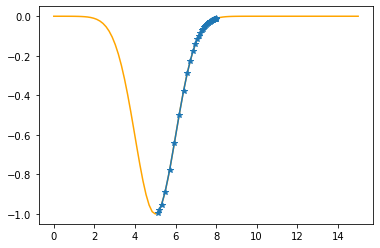

---------------------------------------------
Step #42
The derivative (gradient) at x = 5.11742 is 0.1166
	As it is positive, go left by: (this amount)*eta(=0.40).
	==> The new x is 5.11742-0.04664=5.07077


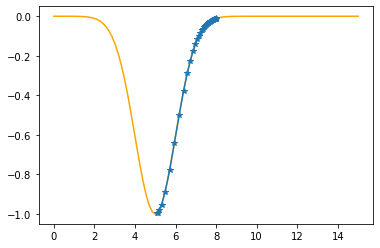

---------------------------------------------
Step #43
The derivative (gradient) at x = 5.07077 is 0.0706
	As it is positive, go left by: (this amount)*eta(=0.40).
	==> The new x is 5.07077-0.02824=5.04253


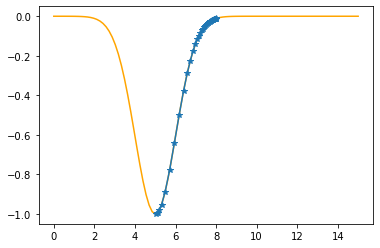

---------------------------------------------
Step #44
The derivative (gradient) at x = 5.04253 is 0.0425
	As it is positive, go left by: (this amount)*eta(=0.40).
	==> The new x is 5.04253-0.01700=5.02554


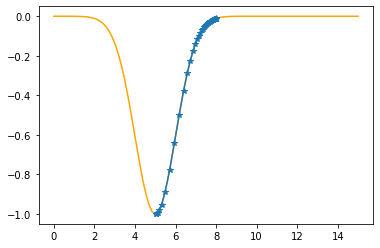

---------------------------------------------
Step #45
The derivative (gradient) at x = 5.02554 is 0.0255
	As it is positive, go left by: (this amount)*eta(=0.40).
	==> The new x is 5.02554-0.01021=5.01533


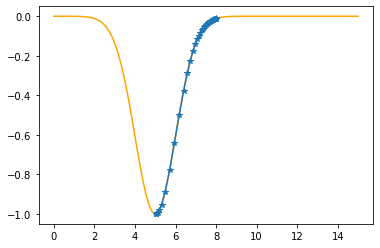

---------------------------------------------
Step #46
The derivative (gradient) at x = 5.01533 is 0.0153
	As it is positive, go left by: (this amount)*eta(=0.40).
	==> The new x is 5.01533-0.00613=5.00920


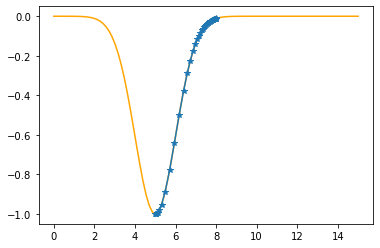

---------------------------------------------
Step #47
The derivative (gradient) at x = 5.00920 is 0.0092
	As it is positive, go left by: (this amount)*eta(=0.40).
	==> The new x is 5.00920-0.00368=5.00552


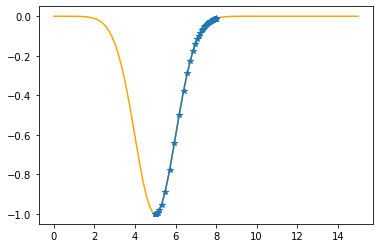

---------------------------------------------
Step #48
The derivative (gradient) at x = 5.00552 is 0.0055
	As it is positive, go left by: (this amount)*eta(=0.40).
	==> The new x is 5.00552-0.00221=5.00331


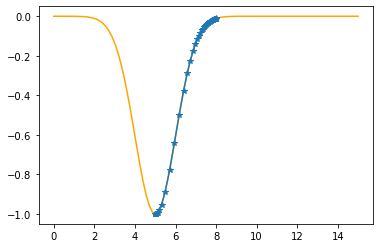

---------------------------------------------
Step #49
The derivative (gradient) at x = 5.00331 is 0.0033
	As it is positive, go left by: (this amount)*eta(=0.40).
	==> The new x is 5.00331-0.00132=5.00199


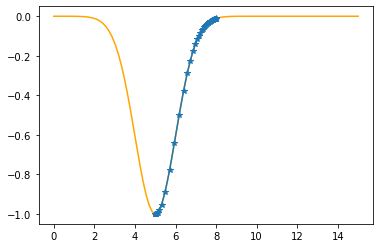

---------------------------------------------
Step #50
The derivative (gradient) at x = 5.00199 is 0.0020
	As it is positive, go left by: (this amount)*eta(=0.40).
	==> The new x is 5.00199-0.00079=5.00119


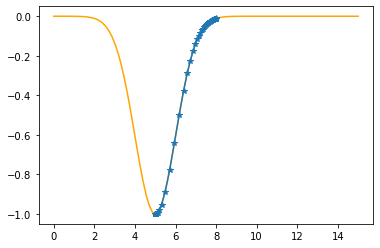

---------------------------------------------
Step #51
The derivative (gradient) at x = 5.00119 is 0.0012
	As it is positive, go left by: (this amount)*eta(=0.40).
	==> The new x is 5.00119-0.00048=5.00072


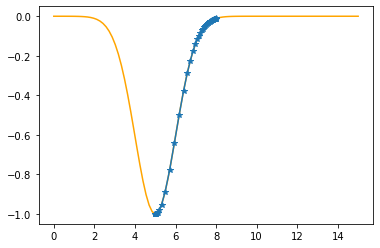

---------------------------------------------
Step #52
The derivative (gradient) at x = 5.00072 is 0.0007
	As it is positive, go left by: (this amount)*eta(=0.40).
	==> The new x is 5.00072-0.00029=5.00043


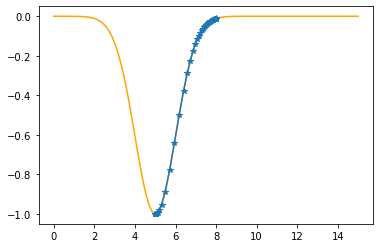

---------------------------------------------
Step #53
The derivative (gradient) at x = 5.00043 is 0.0004
	As it is positive, go left by: (this amount)*eta(=0.40).
	==> The new x is 5.00043-0.00017=5.00026


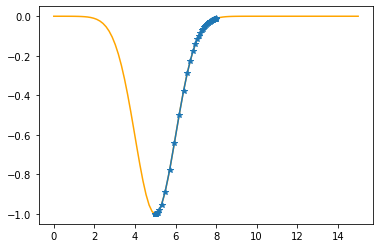

---------------------------------------------
Step #54
The derivative (gradient) at x = 5.00026 is 0.0003
	As it is positive, go left by: (this amount)*eta(=0.40).
	==> The new x is 5.00026-0.00010=5.00015


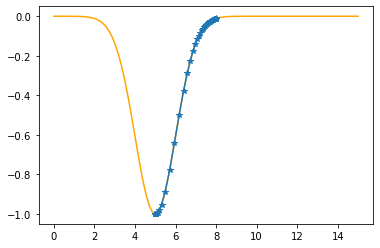

---------------------------------------------
Step #55
The derivative (gradient) at x = 5.00015 is 0.0002
	As it is positive, go left by: (this amount)*eta(=0.40).
	==> The new x is 5.00015-0.00006=5.00009


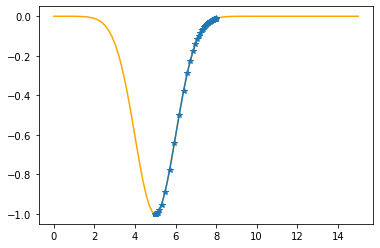

---------------------------------------------
Step #56
The derivative (gradient) at x = 5.00009 is 0.0001
	As it is sufficiently close to zero, we have found the minima!


In [38]:
x = 8
N = 60
eta = .4
tolerance = 1E-4
xs_so_far = [x]
fs_so_far = [f(x,mu,sigma)]
for i in range(N):
    gg = g(x,mu,sigma)
    print("Step #{:d}".format(i+1))
    print("The derivative (gradient) at x = {:7.5f} is {:5.4f}"\
          .format(x,gg))
    if(np.abs(gg)<tolerance):
        print("\tAs it is sufficiently close to zero, we have found the minima!")
        break
    elif(gg>0):
        print("\tAs it is positive, go left by: "+
              "(this amount)*eta(={:.2f}).".format(eta))
    else:
        print("\tAs it is negative, go right by: "+
              "|this amount|*eta(={:.2f}).".format(eta))

    delta = -gg*eta
    x0 = x
    x = x + delta
    xs_so_far.append(x)
    fs_so_far.append(f(x,mu,sigma))
    print("\t==> The new x is {:7.5f}{:+7.5f}={:7.5f}".format(x0,delta,x))
    plt.plot(xx,f(xx,mu,sigma),color="orange")
    plt.plot(xs_so_far,fs_so_far,"*-")
    plt.show()

    print("-"*45)

# Fitting parameters via the gradient descent algorithm

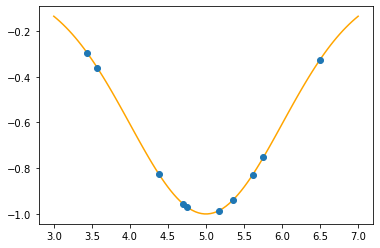

In [39]:
mu = 5
sigma = 1

N = 10
x = np.random.rand(N)*4+3
t = f(x,mu,sigma)

xx = np.linspace(3,7,100)

plt.plot(xx,f(xx,mu,sigma),color="orange")
plt.plot(x,t,"o")
plt.show()

$\newcommand{\diff}{\text{d}}
\newcommand{\dydx}[2]{\frac{\text{d}#1}{\text{d}#2}}
\newcommand{\ddydx}[2]{\frac{\text{d}^2#1}{\text{d}#2^2}}
\newcommand{\pypx}[2]{\frac{\partial#1}{\partial#2}}
\newcommand{\unit}[1]{\,\text{#1}}$

We have the data points, we know the function but we don't have the mu & sigma.

$$f(x;\mu,\sigma)=-\exp{\left[-\frac{(x-\mu)^2}{2\sigma^2}\right]}$$

The function we are going to try to minimize will be the difference between the real values ($\{t_i\}$) corresponding to $\{x_i\}$ and the projected values ($\{y_i\}$):

$$F(x_i,t_i,\mu,\sigma) = t_i - f(x_i;\mu,\sigma)$$

Begin by calculating the derivatives:

$$\pypx{F}{\mu}=\frac{x_i-\mu}{\sigma^2}\exp{\left[-\frac{(x_i-\mu)^2}{2\sigma^2}\right]}\\
\pypx{F}{\sigma}=\frac{(x_i-\mu)^2}{\sigma^3}\exp{\left[-\frac{(x_i-\mu)^2}{2\sigma^2}\right]}$$

_(don't forget that $\{x_i\}$ and $\{t_i\}$ are fixed!)_

Can you see the problem in this approach? As $\{t_i\}$ are fixed, the problem is reduced to finding the $(\mu,\sigma)$ set that will make $f(x_i;\mu,\sigma)$ minimum, regardless of $\{t_i\}$ values. If we follow this approach, we will end up with $(\mu,\sigma)$ that will most likely fix the values all very close to 0.

You are invited to try this approach, i.e.,

```python
def F_mu(x,mu,sigma):
    return (x-mu)/sigma**2*np.exp(-(x-mu)**2/(2*sigma**2))
def F_sigma(x,mu,sigma):
    return (x-mu)**2/sigma**3*np.exp(-(x-mu)**2/(2*sigma**2))
```

But what we really have in mind is the fact that, for a given $x_i$, we want to find values as close to the corresponding $t_i$ as possible. One way to obtain this would be to define the error function as:

$$F(x_i,t_i,\mu,\sigma) = \left[t_i - f(x_i;\mu,\sigma)\right]^2=\left\lbrace t_i -
\left[-\exp{\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)}\right]
\right\rbrace^2$$

and then we would have the following derivatives:

$$\pypx{F}{\mu} = \frac{2(x_i-\mu)}{\sigma^2}\exp{\left[-\frac{(x_i-\mu)^2}{2\sigma^2}\right]}\left\lbrace t_i+\exp{\left[-\frac{(x_i-\mu)^2}{2\sigma^2}\right]}\right\rbrace\\
\pypx{F}{\sigma}=\frac{2(x_i-\mu)^2}{\sigma^3}\exp{\left[-\frac{(x_i-\mu)^2}{2\sigma^2}\right]}\left\lbrace t_i+\exp{\left[-\frac{(x_i-\mu)^2}{2\sigma^2}\right]}\right\rbrace$$

_(Evaluated via WolframAlpha: [1](https://www.wolframalpha.com/input?i=d%2Fdu+%28t%2Bexp%28-%28x-u%29%5E2%2F%282*s%5E2%29%29%29%5E2), [2](https://www.wolframalpha.com/input?i=d%2Fds+%28t%2Bexp%28-%28x-u%29%5E2%2F%282*s%5E2%29%29%29%5E2))_

In [40]:
def F_mu(x,t,mu,sigma):
    return 2*(x-mu)/sigma**2*np.exp(-(x-mu)**2/(2*sigma**2))*\
(t+np.exp(-(x-mu)**2/(2*sigma**2)))

def F_sigma(x,t,mu,sigma):
    return 2*(x-mu)**2/sigma**3*np.exp(-(x-mu)**2/(2*sigma**2))*\
(t+np.exp(-(x-mu)**2/(2*sigma**2)))

In [41]:
np.array([x,t]).T

array([[ 4.69524325, -0.95462342],
       [ 5.16697107, -0.98615704],
       [ 5.75421959, -0.75244784],
       [ 4.3843321 , -0.82735329],
       [ 4.75611602, -0.97069817],
       [ 5.35619635, -0.93853238],
       [ 5.61464869, -0.82787218],
       [ 3.44106334, -0.29666796],
       [ 3.57161062, -0.36054154],
       [ 6.49670943, -0.3262571 ]])

As the sum of the absolute errors is sufficiently close to zero (0.0000085),
	breaking the iteration at the 19. step!
mu: 5.0000	sigma: 1.0000


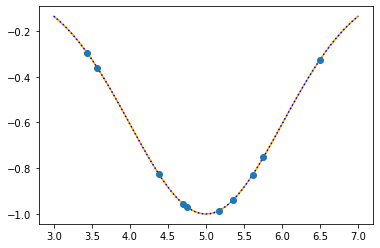

In [42]:
eta = 1

# Starting values
mu_opt = 2.7
sigma_opt = 2.3
tolerance = 1E-4

for i in range(10000):
    for ii in range(x.size):
        xi = x[ii]
        ti = t[ii]
        #print(xi,ti)
        F_mu_xi = F_mu(xi,ti,mu_opt,sigma_opt)
        F_sigma_xi = F_sigma(xi,ti,mu_opt,sigma_opt)
        mu_opt -= eta*F_mu_xi
        sigma_opt -= eta*F_sigma_xi
    total_absolute_error = np.sum(np.abs(t-f(x,mu_opt,sigma_opt)))
    if(total_absolute_error < tolerance):
        print(("As the sum of the absolute errors is sufficiently close to zero ({:.7f}),\n"+
              "\tbreaking the iteration at the {:d}. step!").
              format(total_absolute_error,i+1))
        break
print("mu: {:.4f}\tsigma: {:.4f}".format(mu_opt,sigma_opt))

plt.plot(xx,f(xx,mu,sigma),color="orange")
plt.plot(xx,f(xx,mu_opt,sigma_opt),":b")
plt.plot(x,t,"o")
plt.show()

In [43]:
def f(x,mu,sigma):
    return -np.exp(-(x-mu)**2/(2*sigma**2))

In [44]:
# Doing the same thing via curve_fit():
# Unbounded
res,_ = opt.curve_fit(f,x,t,[2.7,2.3])
res

array([-27370639.4290217 ,  34064337.46171098])

In [45]:
# Bounded
res,_ = opt.curve_fit(f,x,t,[2.7,2.3],bounds=[(2,0),(7,5)])
res

array([2.        , 4.48817981])

In [46]:
# And via optimize.minimize():
def F(musigma,x,t):
    return np.sum((t + np.exp(-(x-musigma[0])**2/(2*musigma[1]**2)))**2)

In [47]:
# Unbounded
res = opt.minimize(F,x0=(2.7,2.3),args=(x,t))
res.x,res.fun

(array([-1351.52257325,  1692.29277162]), 0.7244191813899243)

In [48]:
# Bounded
res = opt.minimize(F,x0=(2.7,2.3),args=(x,t),bounds=[(3,6.5),(None,None)])
res.x,res.fun

(array([4.99999987, 1.00000024]), 1.5195586603351214e-13)

## Stochastic Gradient Descent Algorithm (Optional)

In this approach, instead of optimizing the variables at every step for one data point, we optimize them as a whole:

As the sum of the absolute errors is sufficiently close to zero (0.0000753),
	breaking the iteration at the 145. step!
mu: 5.0000	sigma: 1.0000


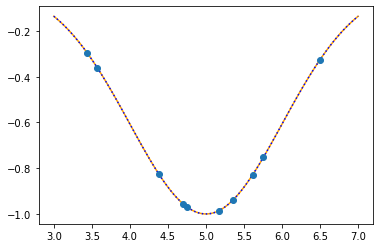

In [49]:
eta = 0.1

# Starting values
mu_opt = 3.0
sigma_opt = 2.3
tolerance = 1E-4
total_absolute_error0 = 1000

for i in range(10000):
    d_mu    = -eta*np.sum(F_mu(x,t,mu_opt,sigma_opt))
    d_sigma = -eta*np.sum(F_sigma(x,t,mu_opt,sigma_opt))

    mu_opt    += d_mu
    sigma_opt += d_sigma

    total_absolute_error = np.sum(np.abs(t-f(x,mu_opt,sigma_opt)))

    if(total_absolute_error < tolerance):
        print(("As the sum of the absolute errors is sufficiently close to zero ({:.7f}),\n"+
              "\tbreaking the iteration at the {:d}. step!").
              format(total_absolute_error,i+1))
        break
print("mu: {:.4f}\tsigma: {:.4f}".format(mu_opt,sigma_opt))

plt.plot(xx,f(xx,mu,sigma),color="orange")
plt.plot(xx,f(xx,mu_opt,sigma_opt),":b")
plt.plot(x,t,"o")
plt.show()

# Case Study: 2 Springs, 1 Mass, 1 Side

Consider the system that consists of a mass attached to springs from one side as shown in the figure:

![imgs/06_2Springs1Mass.png](imgs/06_2Springs1Mass.png)

The potential energy of the system is given by the equation:

$$ V(x) = \frac{1}{2}k_1(x-x_1)^2 + \frac{1}{2}k_2(x-x_2)^2$$

where $k_1$, $k_2$, $x_1$, and $x_2$ are constants and they are the spring constants and equilibrium lengths of the springs, respectively.

a) Find the equilibrium positions of the particle, i.e., the locations where the potential energy is minimum for:

$k_1 = 1 \text{ N/m},\, k_2 = 2 \text{ N/m},\, x_1= 0.3 \text{ m},\, x_2=0.7 \text{ m}$

In [50]:
def V(x,k1,k2,x1,x2):
    return 0.5*k1*(x-x1)**2 + 0.5*k2*(x-x2)**2

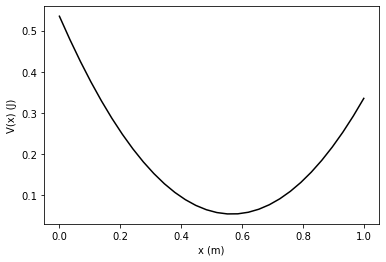

In [51]:
k1 = 1 # N/m
k2 = 2 # N/m
x1 = 0.3 # m
x2 = 0.7 # m

x = np.linspace(0,1,30)
Vx = V(x,k1,k2,x1,x2)

plt.plot(x,Vx,"k-")
plt.xlabel("x (m)")
plt.ylabel("V(x) (J)")
plt.show()

In [52]:
res = opt.minimize(V,0,(k1,k2,x1,x2))
res

      fun: 0.05333333333333341
 hess_inv: array([[0.33333333]])
      jac: array([-9.31322575e-10])
  message: 'Optimization terminated successfully.'
     nfev: 8
      nit: 3
     njev: 4
   status: 0
  success: True
        x: array([0.56666666])

In [53]:
V(17/30,k1,k2,x1,x2)

0.05333333333333333

In [54]:
res = opt.root(V,0.6,(k1,k2,x1,x2))
res

    fjac: array([[-1.]])
     fun: array([0.05333336])
 message: 'The iteration is not making good progress, as measured by the \n  improvement from the last ten iterations.'
    nfev: 20
     qtf: array([-0.05333336])
       r: array([0.001347])
  status: 5
 success: False
       x: array([0.56681034])

In [55]:
V(res.x,k1,k2,x1,x2)

array([0.05333336])

b) If its mechanical energy is given as 3 J, find the positions where its velocity is 0, i.e., _turning points_.

In [56]:
E = 3
def K(x,k1,k2,x1,x2):
    return E - V(x,k1,k2,x1,x2)

In [57]:
res = opt.root(K,x0=1,args=(k1,k2,x1,x2))
res 

    fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([-1.05426778e-12])
       r: array([4.20475916])
  status: 1
 success: True
       x: array([1.96825307])

In [58]:
K(res.x,k1,k2,x1,x2)

array([0.])

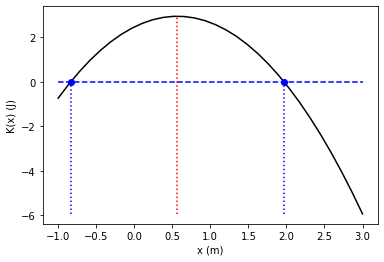

In [59]:
x = np.linspace(-1,3,30)
x_m = [-0.83491974,1.96825307]
plt.plot(x,K(x,k1,k2,x1,x2),"k-")
plt.plot(x_m,[0,0],"bo")
plt.plot(x,np.zeros(30),"--b")
Kx3 = K(3,k1,k2,x1,x2)
plt.plot([x_m[0],x_m[0]],[Kx3,0],":b")
plt.plot([x_m[1],x_m[1]],[Kx3,0],":b")
plt.plot([17/30,17/30],[Kx3,K(17/30,k1,k2,x1,x2)],":r")
plt.xlabel("x (m)")
plt.ylabel("K(x) (J)")
plt.show()

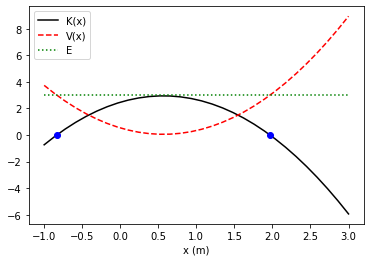

In [60]:
x = np.linspace(-1,3,30)
x_m = [-0.83491974,1.96825307]
plt.plot(x,K(x,k1,k2,x1,x2),"k-")
plt.plot(x,V(x,k1,k2,x1,x2),"r--")
plt.plot(x,E*np.ones(len(x)),":g")
plt.plot(x_m,[0,0],"bo")

plt.xlabel("x (m)")
plt.legend(["K(x)","V(x)","E"])
plt.show()

## Analytical Solutions

a)

$$V(x) = \frac{1}{2}k_1(x-x_1)^2 + \frac{1}{2}k_2(x-x_2)^2$$

$$\begin{align*} \rightarrow \dydx{V}{x}=k_1(x_0-x_1)+k_2(x_0-x_2) &= 0\\
 k_1x_0-k_1x_1+k_2x_0-k_2x_2 &= 0\\
 (k_1+k_2)x_0-(k_1x_1 + k_2x_2) &=0\\
 \Rightarrow x_0 = \frac{k_1x_1 + k_2x_2}{k_1+k_2}&
\end{align*}$$

In [61]:
(k1*x1+k2*x2)/(k1+k2)

0.5666666666666667

b)

$$E - V(x_0) = K(x_0) = 0$$

$$\begin{align} V(x_0) &= E\\
 \frac{1}{2}k_1(x_0-x_1)^2 + \frac{1}{2}k_2(x_0-x_2)^2 &= E\\
 k_1(x_0-x_1)^2 + k_2(x_0-x_2)^2 &= 2E\\
 k_1x_0^2+k_1x_1^2 -2k_1x_1x_0+k_2x_0^2+k_2x_2^2 -2k_2x_2x_0&=2E\\
 \underbrace{(k_1+k_2)}_{a}x_0^2\underbrace{-2(k_1x_1+k_2x_2)}_{b}x_0+\underbrace{k_1x_1^2+k_2x_2^2-2E}_{c} &= 0\\
 \leftrightarrow ax_0^2+bx_0+c = 0
\end{align}$$

In [62]:
a = (k1+k2)
b = -2*(k1*x1+k2*x2)
c = (k1*x1**2+k2*x2**2-2*E)

delta = b**2-4*a*c
(-b+np.sqrt(delta))/(2*a),(-b-np.sqrt(delta))/(2*a)

(1.9682530694419091, -0.8349197361085757)

In [63]:
np.roots([(k1+k2),-2*(k1*x1+k2*x2),(k1*x1**2+k2*x2**2-2*E)])

array([ 1.96825307, -0.83491974])